# 4. 데이터 준비 실습과제

예제를 참고하여 본인의 데이터 세트에 대해 동일한 항목으로 내용을 작성하기 바랍니다.

In [1]:
#필요한 패키지를 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#jupyter에서 matplotlib을 사용해 만든 graph를 화면에 표시하기 위해 필요
%matplotlib inline 

#아래는 한글을 사용할 때 깨지는 문제에 대한 해결
from matplotlib import font_manager, rc
#font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()   #윈도우
font_name = 'AppleGothic'  #맥 OS 
rc('font', family=font_name) 			

#그래프의 축 등에서 음수를 표시할 때 minus sign이 깨지는 것 해결
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

### 1. 데이터 소스 및 설명
**설명: 아래와 같이 데이터의 소스, 설명 및 항목 그 외 데이터의 이해를 위한 설명을 추가**
- 데이터 소스: https://www.kaggle.com/code/ibrahimelgmmal/heart-disease-classification
- 데이터 설명: 이 데이터 세트는 1988년에 작성되었으며 클리블랜드, 헝가리, 스위스 및 Long Beach V의 4개 데이터베이스로 구성됩니다. 여기에는 예측 속성을 포함하여 76개의 속성이 포함되어 있지만 발표된 모든 실험에서는 그 중 14개의 하위 집합을 사용한다고 언급되어 있습니다. "표적" 필드는 환자의 심장 질환의 존재를 의미합니다. 0 = 질병 없음, 1 = 질병이 있는 정수 값입니다.

- 데이터 항목:
    - age: 나이
    - sex: 성별
    - chest pain type (4 values): 흉통 유형(4개 값)
    - resting blood pressure: 안정기 혈압
    - serum cholestoral in mg/dl: 혈청 콜레스테롤
    - fasting blood sugar > 120 mg/dl: 공복 혈당
    - resting electrocardiographic results (values 0,1,2): 안정시 심전도 결과
    - maximum heart rate achieved: 최대 심박수 달성
    - exercise induced angina: 운동으로 인한 협심증
    - oldpeak = ST depression induced by exercise relative to rest: 휴식에 비해 운동으로 인해 유발된 ST 우울증
    - the slope of the peak exercise ST segment: 최대 운동 ST 세그먼트의 기울기
    - number of major vessels (0-3) colored by flourosopy: 형광투시로 착색된 주요 혈관 수
    - thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

### 2. 데이터 불러오기 및 확인
**설명: 문서편집기로 데이터의 내용을 확인하고, pandas를 이용해 내용에 맞게(인덱스, 헤더 등) 불러와서 다양한 정보를 출력**

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### 3. 결측치 확인 및 처리
**설명: 결측치를 확인하고, 결측치가 있는 경우 제거 및 변환 작업을 수행**

In [5]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### 4. 이상치 확인 및 처리
**설명: 이상치가 있는지 확인하고, 이상치가 발견된 경우 제거 및 변환 작업을 수행**

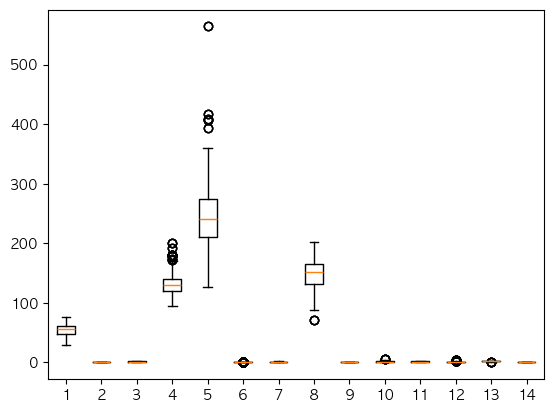

In [6]:
plt.boxplot(df)
plt.show()

In [7]:
# iqr을 이용해 최대허용값과 최소허용값을 계산
iqr = df.quantile(0.75, axis=0) - df.quantile(0.25, axis=0)
upper_bound = df.quantile(0.75, axis=0) + 1.5 * iqr
print(upper_bound)
lower_bound = df.quantile(0.25, axis=0) - 1.5 * iqr
print(lower_bound)

age          80.5
sex           2.5
cp            5.0
trestbps    170.0
chol        371.0
fbs           0.0
restecg       2.5
thalach     217.0
exang         2.5
oldpeak       4.5
slope         3.5
ca            2.5
thal          4.5
target        2.5
dtype: float64
age          28.5
sex          -1.5
cp           -3.0
trestbps     90.0
chol        115.0
fbs           0.0
restecg      -1.5
thalach      81.0
exang        -1.5
oldpeak      -2.7
slope        -0.5
ca           -1.5
thal          0.5
target       -1.5
dtype: float64


In [8]:
(df > upper_bound).any() #결과를 박스플롯과 비교

age         False
sex         False
cp          False
trestbps     True
chol         True
fbs          True
restecg     False
thalach     False
exang       False
oldpeak      True
slope       False
ca           True
thal        False
target      False
dtype: bool

In [9]:
(df < lower_bound).any() #결과를 박스플롯과 비교

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach      True
exang       False
oldpeak     False
slope       False
ca          False
thal         True
target      False
dtype: bool

In [10]:
# 이상치가 아닌 행들을 출력 - 위 조건과는 반대
# 행의 값 중에서 하나라도(any) 작은 것이 아니라 모두(all) lower_bound보다 작은 행을 선택
df[(df <= upper_bound).all(axis=1) & (df >= lower_bound).all(axis=1)].shape

(769, 14)

In [11]:
# 위 조건에 맞는 행들로 df를 교체하고 통계를 확인
df = df[(df <= upper_bound).all(axis=1) & (df >= lower_bound).all(axis=1)]
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,769.000000,769.000000,769.000000,769.000000,769.000000,769.0,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000
mean,53.431730,0.691808,0.924577,128.685306,242.075423,0.0,0.551365,150.669701,0.323797,0.972432,1.438231,0.495449,2.331599,0.548765
std,9.225098,0.462047,1.019105,15.314066,44.521145,0.0,0.515667,22.567898,0.468228,1.050258,0.589973,0.705479,0.568764,0.497940
min,29.000000,0.000000,0.000000,94.000000,131.000000,0.0,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,46.000000,0.000000,0.000000,120.000000,209.000000,0.0,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,54.000000,1.000000,1.000000,130.000000,239.000000,0.0,1.000000,154.000000,0.000000,0.600000,1.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,270.000000,0.0,1.000000,168.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,76.000000,1.000000,3.000000,170.000000,360.000000,0.0,2.000000,202.000000,1.000000,4.000000,2.000000,2.000000,3.000000,1.000000


In [12]:
# 이상치가 없음을 확인
(df > upper_bound).any() | (df < lower_bound).any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

### 5. 궁금한 사항들 알아보기
**아래 예제를 참고하여 인덱싱, 슬라이싱, 불리안 인덱싱 등의 방법을 이용해 궁금한 것을 알아봄**

In [13]:
# 가장 높은 나이
df['age'].max()

76

In [14]:
# 가장 나이가 많은 사람의 정보 출력
df.loc[df['age'].idxmax()]

age          76.0
sex           0.0
cp            2.0
trestbps    140.0
chol        197.0
fbs           0.0
restecg       2.0
thalach     116.0
exang         0.0
oldpeak       1.1
slope         1.0
ca            0.0
thal          2.0
target        1.0
Name: 99, dtype: float64

In [15]:
# 나이가 가장 많은 모든 사람들의 심장병 발병 여부
df[df['age'] == df['age'].max()]['target']

99     1
535    1
965    1
Name: target, dtype: int64

In [16]:
# 나이가 65세 이상인 사람들의 심장병 발병 여부 통계
df[df['age'] >= 65]['target'].value_counts()

target
1    54
0    29
Name: count, dtype: int64

### 6. 그래프 그리기
**아래 예제를 참조하여 막대그래프, 히스토그램, 산점도 등을 이용해 다양한 그래프 그리기**

In [17]:
# 성별 빈도수 계산
bar_data = df['sex'].value_counts()
bar_data

sex
1    532
0    237
Name: count, dtype: int64

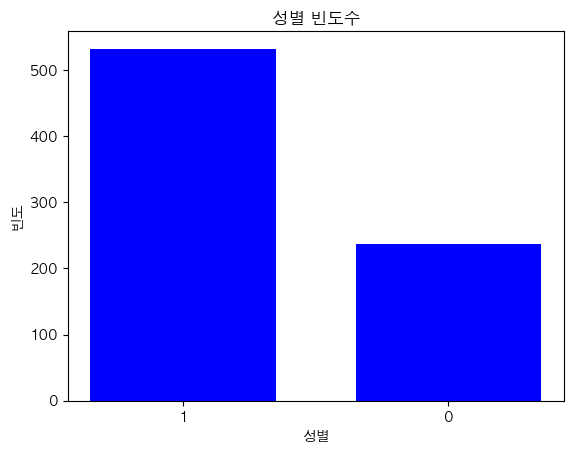

In [18]:
# 성별 빈도수 그래프
plt.bar(bar_data.index.astype('str'), bar_data.values, width=0.7, color="blue")
plt.xlabel('성별')
plt.ylabel('빈도')
plt.title('성별 빈도수')
plt.show()

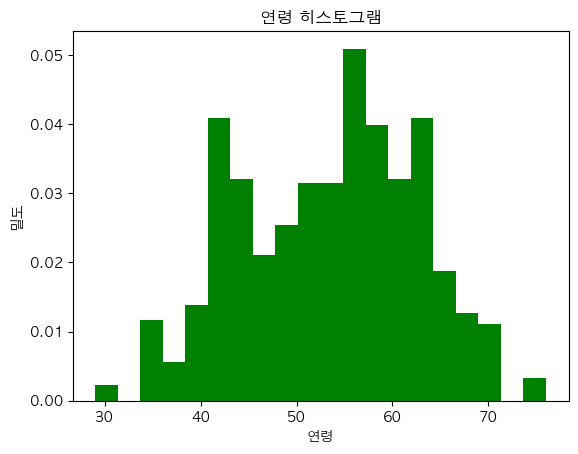

In [19]:
# 연령 히스토그램
plt.hist(df['age'], bins=20, density=True, facecolor='g')
plt.xlabel('연령')
plt.ylabel('밀도')
plt.title('연령 히스토그램')
plt.show()

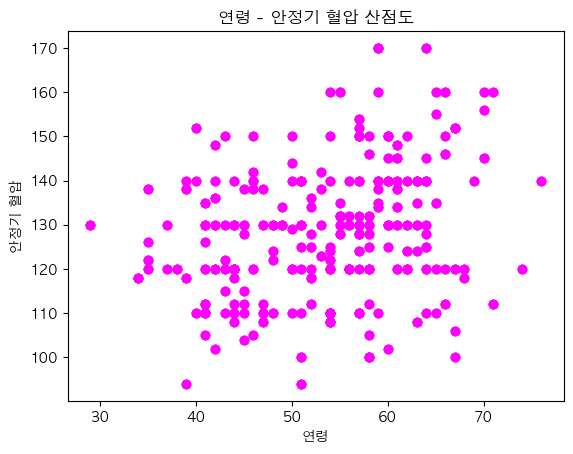

In [20]:
# 연령 - 안정기 혈압 산점도
plt.plot(df['age'], df['trestbps'], 'o', color='magenta')    
plt.xlabel('연령')
plt.ylabel('안정기 혈압')
plt.title('연령 - 안정기 혈압 산점도')
plt.show()

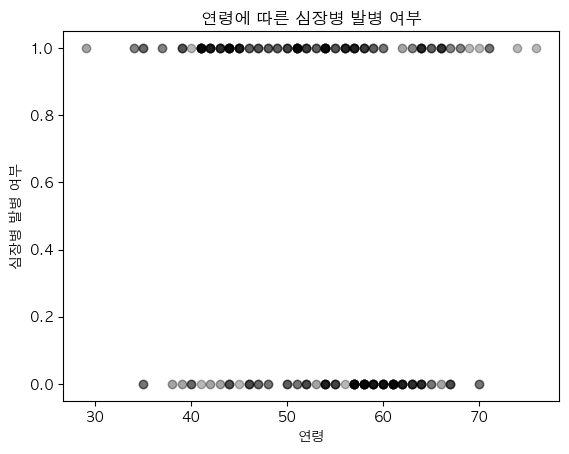

In [21]:
# 연령에 따른 심장병 발병 여부 산점도
plt.plot(df['age'], df['target'], 'o', color='black', alpha=0.1)    
plt.xlabel('연령')
plt.ylabel('심장병 발병 여부')
plt.title('연령에 따른 심장병 발병 여부')
plt.show()

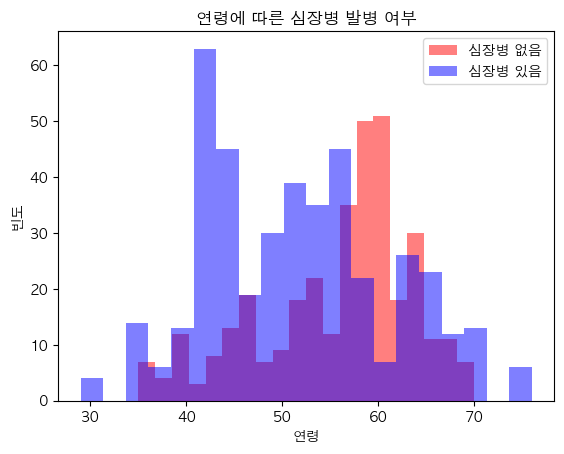

In [22]:
# 연령에 따른 심장병 발병 여부 히스토그램
t0 = df[df['target'] == 0]['age'] # target이 0인 값을 분리
t1 = df[df['target'] == 1]['age'] # target이 1인 값을 분리

plt.hist(t0, bins=20, color='red', alpha=.5)
plt.hist(t1, bins=20, color='blue', alpha=.5)
plt.xlabel('연령')
plt.ylabel('빈도')
plt.title('연령에 따른 심장병 발병 여부')
plt.legend(['심장병 없음', '심장병 있음'])
plt.show()

/Users/sangunpark/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sangunpark/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


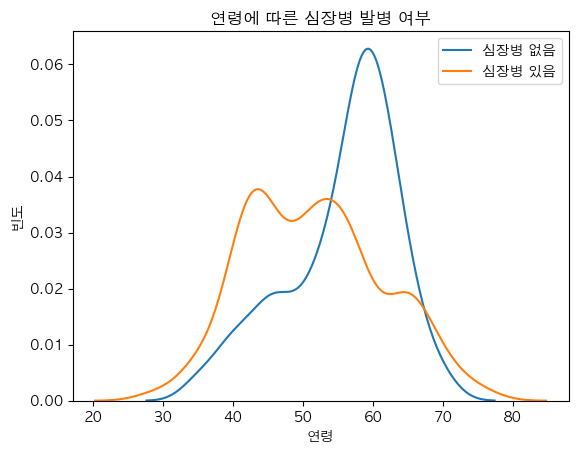

In [23]:
# 연령에 따른 심장병 발병 여부 히스토그램
sns.kdeplot(t0)
sns.kdeplot(t1)
plt.xlabel('연령')
plt.ylabel('빈도')
plt.title('연령에 따른 심장병 발병 여부')
plt.legend(['심장병 없음', '심장병 있음'])
plt.show()